In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [5]:
dataset= "advertising_sales_data.xlsx"
df = pd.read_excel(dataset)


Assigning independent to x and dependent to y

In [6]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1]

1 & 2. Avg of TV and Correlation between radio advertising expenditure and product sales

In [7]:
print(df.isnull().sum())
print("Average TV Advertising Cost:", df["TV"].mean())
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix)

Campaign     0
TV           0
Radio        2
Newspaper    0
Sales        0
dtype: int64
Average TV Advertising Cost: 147.0425
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054848   0.056648  0.901208
Radio      0.054848  1.000000   0.354987  0.349728
Newspaper  0.056648  0.354987   1.000000  0.157960
Sales      0.901208  0.349728   0.157960  1.000000


3. TV has the highest correlation with Sales (0.90) → Strong Positive Impact

Missing Values

In [8]:
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:,[1]])
x[:,[1]] = imputer.transform(x[:,[1]])
print(x)


[[230.1         37.8         69.2       ]
 [ 44.5         39.3         45.1       ]
 [ 17.2         45.9         69.3       ]
 [151.5         41.3         58.5       ]
 [180.8         10.8         58.4       ]
 [  8.7         48.9         75.        ]
 [ 57.5         32.8         23.5       ]
 [120.2         19.6         11.6       ]
 [  8.6          2.1          1.        ]
 [199.8          2.6         21.2       ]
 [ 66.1          5.8         24.2       ]
 [214.7         24.           4.        ]
 [ 23.8         35.1         65.9       ]
 [ 97.5          7.6          7.2       ]
 [204.1         32.9         46.        ]
 [195.4         47.7         52.9       ]
 [ 67.8         36.6        114.        ]
 [281.4         39.6         55.8       ]
 [ 69.2         20.5         18.3       ]
 [147.3         23.26060606  19.1       ]
 [218.4         27.7         53.4       ]
 [237.4          5.1         23.5       ]
 [ 13.2         15.9         49.6       ]
 [228.3         16.9         26.2 

Splitting Data into train and test sets

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)




In [11]:
print(x_train)


[[-1.47861420e+00 -1.50713701e+00 -2.07096465e-01]
 [-5.93912087e-01 -1.51371907e+00 -3.21290955e-01]
 [-1.41452194e+00 -7.37035429e-01 -3.11774748e-01]
 [ 7.07389725e-01  6.32034043e-01  7.63556698e-01]
 [-1.54499547e+00  3.16094934e-01  5.44683926e-01]
 [ 5.73110715e-02 -2.43710921e-03 -5.16373209e-01]
 [-7.33541657e-01  1.54694105e+00  2.16374768e-01]
 [ 9.80926342e-01  9.47973152e-01  9.74221741e-02]
 [ 7.17690268e-01  1.43504595e+00 -4.92582690e-01]
 [ 9.98093912e-01  5.92541655e-01  2.10534195e+00]
 [ 1.68708573e+00  1.25074813e+00  1.01097809e+00]
 [-2.19659059e-01  7.43929144e-01 -8.35166159e-01]
 [-1.40651040e+00 -4.80334903e-01 -3.64113889e-01]
 [ 4.61321221e-01  1.50744866e+00  1.36783587e+00]
 [ 1.41126010e+00 -2.17052312e-01 -1.41089671e+00]
 [ 2.66755427e-01 -8.75258789e-01 -5.87744765e-01]
 [ 8.72198398e-01 -1.17803377e+00 -1.21450598e-01]
 [-1.34241814e+00 -8.09438141e-01 -1.20142119e-02]
 [ 1.02785103e+00 -9.67407696e-01 -1.01121600e+00]
 [-1.13640730e+00  1.71289509e-

In [12]:
print(x_test)

[[ 7.84071539e-01  1.73123886e+00  3.68634087e-01]
 [ 6.89077651e-01 -6.56648223e-02  7.83897591e-02]
 [-5.33253340e-01 -1.44131636e+00 -1.07307135e+00]
 [ 1.57835778e+00 -8.68676724e-01 -4.06936823e-01]
 [ 1.27620855e+00 -1.31485470e-01  2.26009928e-03]
 [ 1.61727094e+00  1.23100194e+00  1.72469365e+00]
 [ 2.40431819e-01  5.46467201e-01  1.09186586e+00]
 [ 4.40720137e-01 -8.22602271e-01  1.35356156e+00]
 [-8.20524012e-01 -4.80334903e-01  5.16135303e-01]
 [ 8.36718753e-01  1.99020197e-02  1.31549673e+00]
 [ 2.54165875e-01 -1.57813729e-01  8.30170150e-01]
 [-8.36547078e-01 -1.84141988e-01 -5.54438039e-01]
 [ 8.28707221e-01  4.62302788e-02 -1.23484687e+00]
 [-3.71878181e-01  1.61276169e+00  1.02049430e+00]
 [ 9.55747239e-01 -9.93735955e-01  1.26315759e+00]
 [-1.89901938e-01  8.95316634e-01  2.34324714e+00]
 [-1.21231657e-01 -3.22365348e-01  2.21132871e-01]
 [ 1.69853077e+00 -1.26360061e+00 -1.02073221e+00]
 [-1.33555111e+00  1.03353999e+00 -9.82667375e-01]
 [ 7.82927034e-01  4.08243841e-

Training Model

In [13]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)


LinearRegression()

Prediction

In [14]:
y_test_pred=regressor.predict(x_test)
y_train_pred = regressor.predict(x_train)

4. PLotting Linear Regression on both Train and Test sets

Vizualisation training set



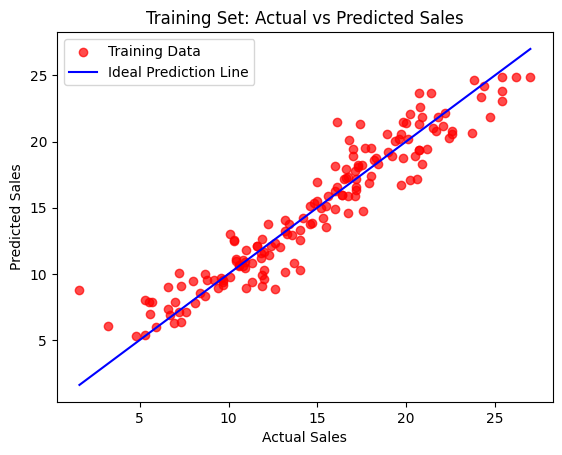

In [15]:
plt.scatter(y_train, y_train_pred, color="red", alpha=0.7, label="Training Data")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color="blue", linestyle="-", label="Ideal Prediction Line")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Training Set: Actual vs Predicted Sales")
plt.legend()
plt.show()

Visualizing Test set

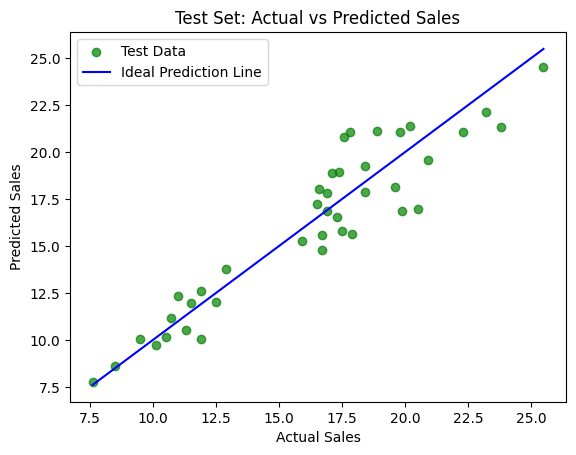

In [16]:
plt.scatter(y_test, y_test_pred, color="green", alpha=0.7, label="Test Data")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="blue", linestyle="-", label="Ideal Prediction Line")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Test Set: Actual vs Predicted Sales")
plt.legend()
plt.show()


5. Prediction on New dataset[$200 on TV, $40 on Radio, and $50 on Newspaper]

In [22]:
new_ad_budget = np.array([[200, 40, 50]])
new_ad_budget_scaled = sc.transform(new_ad_budget)
predicted_sales = regressor.predict(new_ad_budget_scaled)
print(f"Predicted Sales: {predicted_sales[0]:.2f}")

Predicted Sales: 19.73


metrics

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Compute metrics for test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print results
print("Training Performance:")
print(f"Mean Squared Error: {mse_train:.2f}")
print(f"Root Mean Squared Error: {rmse_train:.2f}")
print(f"Mean Absolute Error: {mae_train:.2f}")
print(f"R² Score: {r2_train:.2f}")

print("\nTest Performance:")
print(f"Mean Squared Error: {mse_test:.2f}")
print(f"Root Mean Squared Error: {rmse_test:.2f}")
print(f"Mean Absolute Error: {mae_test:.2f}")
print(f"R² Score: {r2_test:.2f}")

Training Performance:
Mean Squared Error: 2.79
Root Mean Squared Error: 1.67
Mean Absolute Error: 1.24
R² Score: 0.91

Test Performance:
Mean Squared Error: 2.41
Root Mean Squared Error: 1.55
Mean Absolute Error: 1.28
R² Score: 0.87


7. radio and newspaper advertising expenditures are used as predictors

In [24]:
x_train_reduced = x_train[:, [1, 2]]
x_test_reduced = x_test[:, [1, 2]]
regressor_reduced = LinearRegression()
regressor_reduced.fit(x_train_reduced, y_train)
y_pred_reduced = regressor_reduced.predict(x_test_reduced)
from sklearn.metrics import mean_squared_error, r2_score
mse_reduced = mean_squared_error(y_test, y_pred_reduced)
r2_reduced = r2_score(y_test, y_pred_reduced)
print(f"Reduced Model MSE: {mse_reduced:.2f}")
print(f"Reduced Model R² Score: {r2_reduced:.2f}")

Reduced Model MSE: 19.08
Reduced Model R² Score: 0.01
